In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tushare as ts
warnings.filterwarnings("ignore")

#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [30]:
YZMY = ts.get_hist_data('300059', '2019-01-01', '2020-12-31')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [31]:
YZMY.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2020-10-23,26.12,26.23,25.19,25.19,1608701.50,-0.90,-3.45,26.070,26.015,25.125,2131518.73,2140565.68,2156919.84,2.26
2020-10-22,26.10,26.48,26.09,25.65,1934488.38,-0.26,-0.99,26.228,25.958,25.039,2125476.68,2164701.20,2184600.27,2.71
2020-10-21,26.79,26.80,26.35,26.13,1802025.00,-0.40,-1.50,26.154,25.748,24.901,2067216.00,2104494.95,2178273.49,2.53
2020-10-20,25.99,26.87,26.75,25.97,2649678.50,0.78,3.00,26.062,25.534,24.769,2018170.32,2090613.60,2168719.10,3.72
2020-10-19,26.98,27.00,25.97,25.95,2662700.25,-0.01,-0.04,25.936,25.246,24.612,1956919.07,1941057.43,2123650.23,3.73


In [32]:
YZMY.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 2020-10-23 to 2019-01-02
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          439 non-null    float64
 1   high          439 non-null    float64
 2   close         439 non-null    float64
 3   low           439 non-null    float64
 4   volume        439 non-null    float64
 5   price_change  439 non-null    float64
 6   p_change      439 non-null    float64
 7   ma5           439 non-null    float64
 8   ma10          439 non-null    float64
 9   ma20          439 non-null    float64
 10  v_ma5         439 non-null    float64
 11  v_ma10        439 non-null    float64
 12  v_ma20        439 non-null    float64
 13  turnover      439 non-null    float64
dtypes: float64(14)
memory usage: 51.4+ KB


In [33]:
# data = YZMY.head(10)
# data = data.sort_index()
data = YZMY.sort_index()
data = data.iloc[:,0:5]
data

,open,high,close,low,volume
date,,,,,
2019-01-02,12.10,12.10,11.85,11.80,710183.25
2019-01-03,11.85,12.29,11.99,11.85,1061826.88
2019-01-04,11.82,12.98,12.79,11.81,2076575.62
2019-01-07,12.70,12.93,12.82,12.62,1465678.12
2019-01-08,12.73,12.90,12.75,12.65,863626.56
...,...,...,...,...,...
2020-10-19,26.98,27.00,25.97,25.95,2662700.25
2020-10-20,25.99,26.87,26.75,25.97,2649678.50
2020-10-21,26.79,26.80,26.35,26.13,1802025.00


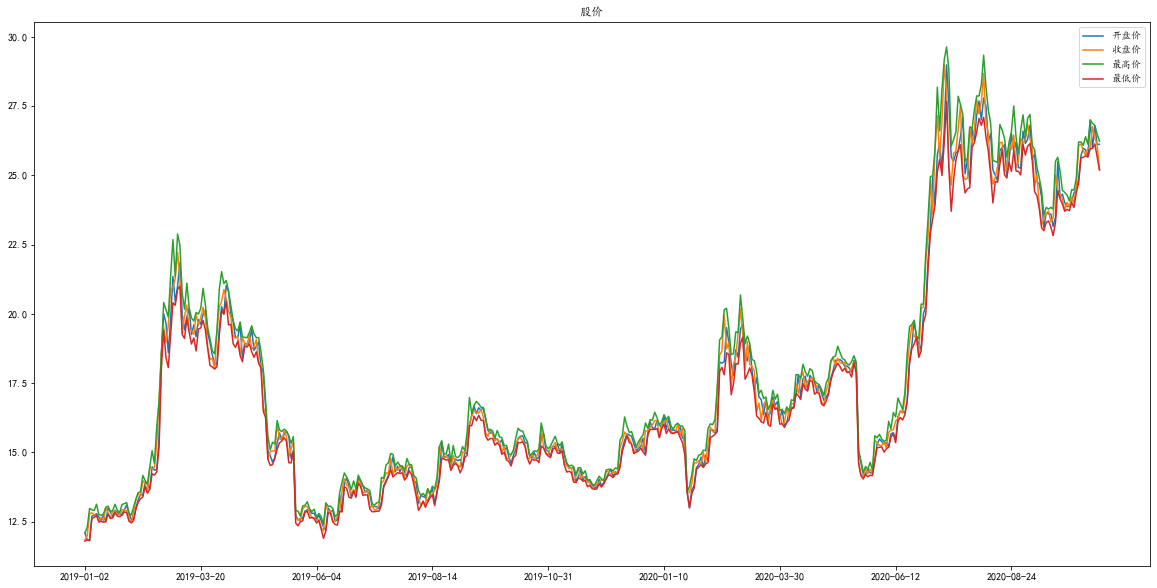

In [34]:
plt.figure(figsize=(20,10))
plt.title('股价')
plt.plot(data.index, data.open , label = '开盘价')
plt.plot(data.index, data.close , label = '收盘价')
plt.plot(data.index, data.high , label = '最高价')
plt.plot(data.index, data.low , label = '最低价')
plt.legend()
plt.gca().set_xticks(data.index[::50])
plt.show()

In [35]:
df = data
# df = data.head(10)
df.head()


# for tup in data.itertuples():
#     print(tup[0],'-->',tup[1:5:])
#     print(tup[0],'-->',tup[1])
    

,open,high,close,low,volume
date,,,,,
2019-01-02,12.10,12.10,11.85,11.80,710183.25
2019-01-03,11.85,12.29,11.99,11.85,1061826.88
2019-01-04,11.82,12.98,12.79,11.81,2076575.62
2019-01-07,12.70,12.93,12.82,12.62,1465678.12
2019-01-08,12.73,12.90,12.75,12.65,863626.56


In [36]:
step = 9
low_list = df['low'].rolling(step, min_periods=step).min()
low_list.fillna(value = df['low'].expanding().min(), inplace = True)
high_list = df['high'].rolling(step, min_periods=step).max()
high_list.fillna(value = df['high'].expanding().max(), inplace = True)
rsv = (df['close'] - low_list) / (high_list - low_list) * 100
rsv


date
2019-01-02    16.666667
2019-01-03    38.775510
2019-01-04    83.898305
2019-01-07    86.440678
2019-01-08    80.508475
                ...    
2020-10-19    67.405063
2020-10-20    92.088608
2020-10-21    75.190840
2020-10-22    60.087719
2020-10-23     0.000000
Length: 439, dtype: float64

In [37]:
data['K'] = pd.DataFrame(rsv).ewm(com=2).mean()
data['D'] = data['K'].ewm(com=2).mean()
data['J'] = 3 * data['K'] - 2 * data['D']
data.head()

,open,high,close,low,volume,K,D,J
date,,,,,,,,
2019-01-02,12.10,12.10,11.85,11.80,710183.25,16.666667,16.666667,16.666667
2019-01-03,11.85,12.29,11.99,11.85,1061826.88,29.931973,24.625850,40.544218
2019-01-04,11.82,12.98,12.79,11.81,2076575.62,55.494972,39.248066,87.988785
2019-01-07,12.70,12.93,12.82,12.62,1465678.12,68.349342,51.336288,102.375450
2019-01-08,12.73,12.90,12.75,12.65,863626.56,73.017066,59.659241,99.732716


In [38]:
last60 = data.tail(60)
last60.head()

,open,high,close,low,volume,K,D,J
date,,,,,,,,
2020-07-24,27.09,27.18,25.01,24.97,6027184.50,42.060010,49.211077,27.757875
2020-07-27,25.05,25.51,24.84,24.36,3804886.75,34.448101,44.290085,14.764133
2020-07-28,25.59,25.61,24.89,24.51,3284567.00,30.773800,39.784656,12.752086
2020-07-29,24.69,26.75,26.70,24.55,4814257.00,44.612252,41.393855,51.049046
2020-07-30,26.68,26.68,26.11,26.01,3131478.75,46.455923,43.081211,53.205348


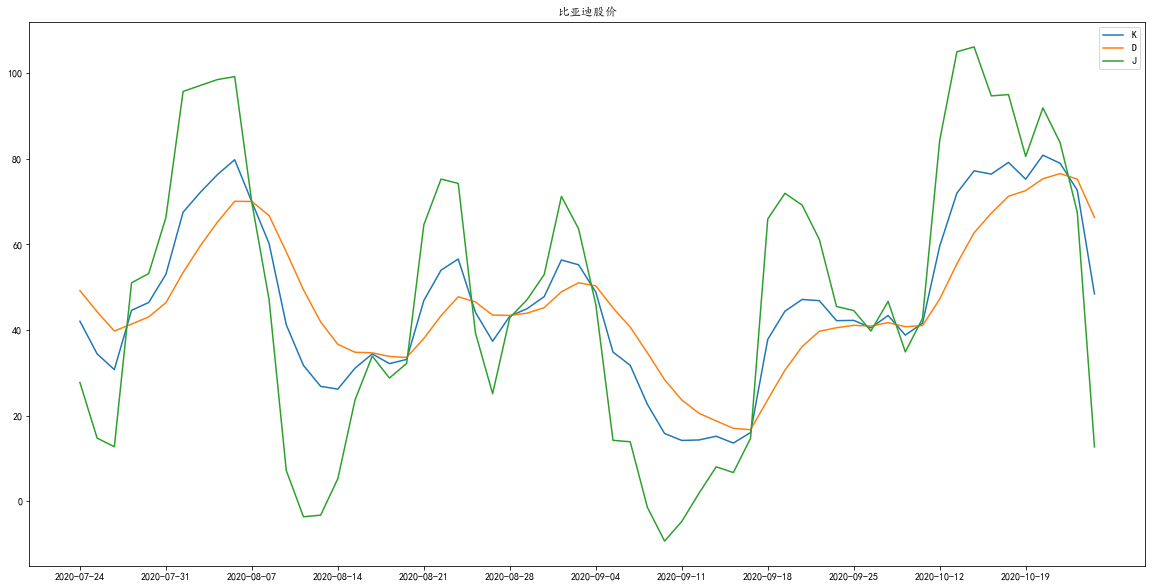

In [39]:
plt.figure(figsize=(20,10))
plt.title('比亚迪股价')
plt.plot(last60.index, last60.K , label = 'K')
plt.plot(last60.index, last60.D , label = 'D')
plt.plot(last60.index, last60.J , label = 'J')
plt.legend()
plt.gca().set_xticks(last60.index[::5])
plt.show()

In [40]:
# del data['KDJ_金叉死叉']
data['金叉死叉'] = ''
kdj_position=data['K']>data['D']
data.loc[kdj_position[(kdj_position == True) & (kdj_position.shift() == False)].index, '金叉死叉'] = '金叉'
data.loc[kdj_position[(kdj_position == False) & (kdj_position.shift() == True)].index, '金叉死叉'] = '死叉'
# data
# data[data['金叉死叉'] != '']

In [41]:
# pd.set_option('display.max_rows', None)  # 行
data60 = data
# data60 = data.tail(60)
data60.head()

,open,high,close,low,volume,K,D,J,金叉死叉
date,,,,,,,,,
2019-01-02,12.10,12.10,11.85,11.80,710183.25,16.666667,16.666667,16.666667,
2019-01-03,11.85,12.29,11.99,11.85,1061826.88,29.931973,24.625850,40.544218,金叉
2019-01-04,11.82,12.98,12.79,11.81,2076575.62,55.494972,39.248066,87.988785,
2019-01-07,12.70,12.93,12.82,12.62,1465678.12,68.349342,51.336288,102.375450,
2019-01-08,12.73,12.90,12.75,12.65,863626.56,73.017066,59.659241,99.732716,


In [42]:
start = 1000000
money = start
num = 0
tmp = money
for tup in data60.itertuples():
    poin = tup[8]
    price = tup[1]
    if poin < 20 :
        if (money > 0) :
            num = money / price
            money = 0
            print ("买入点日期:" + tup[0] + ";当前的J指标是:" + str(round(tup[8], 2)) + ";买入数量为:" + str(round(num, 2)))
    if poin > 80 :
        if (num > 0) :
            money = num * price
            if (money > tmp) :
                print ("\033[1;42m卖出点日期:" + tup[0] + ";当前的J指标是:" + str(round(tup[8], 2)) 
                       + ";此次交易盈利:" + str(round(((money - tmp)/tmp)*100, 2)) + "%;卖出后金额:" + 
                       str(round(money, 2)) + "\033[0m")
            else :
                print ("\033[1;41m卖出点日期:" + tup[0] + ";当前的J指标是:" + str(round(tup[8], 2)) 
                       + ";此次交易亏损:" + str(round(((tmp - money)/tmp)*100, 2)) + "%;卖出后金额:" + 
                       str(round(money, 2)) + "\033[0m")
            tmp = money
            num = 0
if (money == 0) :
    end = data.iloc[-1, 3]
    money = num * end

print ("最终获得资产\033[1;41m" + str(round(money, 2)) + "\033[0m")
res = str(round(((money - start) / start ) * 100,2)) + "%"
print ("获取收益=====>\033[1;41m" + str(round(money - start,2)) + "\033[0m")
print ("最终收益率是=====>\033[1;41m" + res + "\033[0m")

买入点日期:2019-01-02;当前的J指标是:16.67;买入数量为:82644.63
卖出点日期:2019-01-04;当前的J指标是:87.99;此次交易亏损:2.31%;卖出后金额:976859.5
买入点日期:2019-01-30;当前的J指标是:-1.33;买入数量为:77590.11
卖出点日期:2019-02-11;当前的J指标是:100.68;此次交易盈利:5.56%;卖出后金额:1031172.58
买入点日期:2019-03-13;当前的J指标是:2.48;买入数量为:51048.15
卖出点日期:2019-04-03;当前的J指标是:94.0;此次交易亏损:0.89%;卖出后金额:1021983.92
买入点日期:2019-04-12;当前的J指标是:10.83;买入数量为:53339.45
卖出点日期:2019-06-12;当前的J指标是:89.19;此次交易亏损:32.2%;卖出后金额:692879.49
买入点日期:2019-07-04;当前的J指标是:19.85;买入数量为:51022.05
卖出点日期:2019-07-16;当前的J指标是:94.0;此次交易盈利:1.62%;卖出后金额:704104.34
买入点日期:2019-08-05;当前的J指标是:3.61;买入数量为:50654.99
卖出点日期:2019-08-16;当前的J指标是:82.79;此次交易亏损:2.37%;卖出后金额:687388.2
买入点日期:2019-08-30;当前的J指标是:17.38;买入数量为:46602.59
卖出点日期:2019-09-04;当前的J指标是:81.11;此次交易盈利:1.36%;卖出后金额:696708.72
买入点日期:2019-09-18;当前的J指标是:10.28;买入数量为:44123.41
卖出点日期:2019-10-14;当前的J指标是:80.61;此次交易亏损:1.77%;卖出后金额:684354.16
买入点日期:2019-10-23;当前的J指标是:9.37;买入数量为:45654.05
卖出点日期:2019-12-05;当前的J指标是:91.72;此次交易亏损:6.27%;卖出后金额:641439.36
买入点日期:2019-12-27;当前的J指标是:5.51;买入数量为:41356.5
卖出点日期:

In [46]:
YZMY = ts.get_stock_basics()
YZMY

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
688129,N东来,染料涂料,上海,65.59,0.27,1.20,4.15,3.41,0.57,0.58,...,6.18,5.50,20201023,1.62,1.35,0.00,0.00,47.25,18.25,27347.0
300479,神思电子,软件服务,山东,1232.60,1.68,1.69,9.17,5.52,0.74,2.64,...,3.65,6.00,20150612,1.61,0.95,-20.91,-82.20,34.99,0.97,21895.0
300582,英飞特,半导体,浙江,46.21,1.34,1.98,17.72,6.40,4.81,5.10,...,5.76,4.10,20161228,4.15,2.10,-1.74,18.14,39.09,10.74,16390.0
300516,久之洋,电器仪表,湖北,185.49,1.80,1.80,12.58,9.51,2.59,3.43,...,6.04,7.49,20160602,4.98,2.77,-28.42,-24.46,36.99,11.95,14876.0
300898,熊猫乳品,乳制品,浙江,426.51,0.26,1.24,6.79,4.18,1.72,1.64,...,5.63,13.76,20201016,1.21,0.98,0.00,0.00,21.70,4.78,31032.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688135,利扬芯片,半导体,广东,0.00,0.00,0.00,5.92,1.54,3.70,2.29,...,0.00,0.00,0,1.35,0.00,0.00,0.00,49.10,21.66,0.0
688179,阿拉丁,化学制药,上海,0.00,0.00,0.00,3.78,1.92,1.15,1.25,...,0.00,0.00,0,1.06,0.00,0.00,0.00,65.30,26.45,0.0
688221,前沿生物,生物制药,江苏,0.00,0.00,0.00,8.87,3.48,0.20,9.57,...,0.00,0.00,0,-6.81,0.00,0.00,0.00,-73.67,-1488.72,0.0
